# Ejercicio 1 - Heladería

Se quiere calcular la catidad de clientes que tendrá una heladería dependiendo de la temperatura exterior.

- Si la temperatura es <b>alta</b> entonces la heladería estará <b>llena</b>
- Si la temperatura es <b>moderada</b> entonces la heladería estará <b>ocupada</b>
- Si la temperatura es <b>baja</b> entonces la heladería estará <b>tranquila</b>

El número máximo de clientes para el local es de 35 clientes.
Definir los rangos de pertenencias para los antecedentes y consecuentes.

In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

## Antecendentes

Definir y graficar los antecedentes para el problema.

C:\Users\campanajulian\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


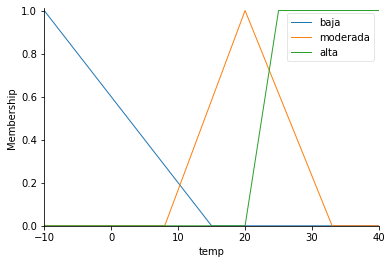

In [2]:
temp = ctrl.Antecedent(np.arange(-10, 41, 1), 'temp')
temp['baja'] = fuzz.trimf(temp.universe, [-10, -10, 15])
temp['moderada'] = fuzz.trimf(temp.universe, [8, 20, 33])
temp['alta'] = fuzz.trapmf(temp.universe, [20, 25, 41, 41])
temp.view()


## Consecuentes

Definir y gráficar los antecedentes para el problema.

C:\Users\campanajulian\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


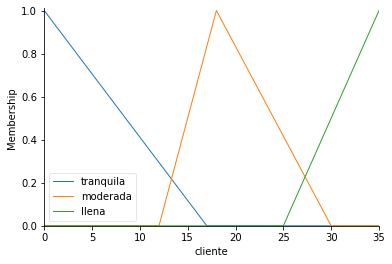

In [3]:
cliente = ctrl.Consequent(np.arange(0, 36, 1), 'cliente')
cliente['tranquila'] = fuzz.trimf(cliente.universe, [0, 0, 17])
cliente['moderada'] = fuzz.trimf(cliente.universe, [12, 18, 30])
cliente['llena'] = fuzz.trimf(cliente.universe, [25, 35, 35])
cliente.view()


## Reglas

Definir las reglas para el sistema.

In [4]:
cliente.defuzzify_method = 'centroid'
rules = []
rules.append(ctrl.Rule(temp['baja'], cliente['tranquila']))
rules.append(ctrl.Rule(temp['moderada'], cliente['moderada']))
rules.append(ctrl.Rule(temp['alta'], cliente['llena']))


## Simulación

Simular y graficar la salida del sistema para las siguientes temperaturas.
 - -10º
 - 0º
 - 10º
 - 14º
 - 20º
 - 33 º

In [5]:
ctrSys = ctrl.ControlSystem(rules)
personas = ctrl.ControlSystemSimulation(ctrSys)

personas.input['temp'] = 33
personas.compute()
personas.print_state() #Archivo control/controlsystem.py modificado
cliente.view(sim=personas)
print("Resultado:"+str(personas.output['cliente']))

 Antecedents 


TypeError: unsupported format string passed to Antecedent.__format__